In [1]:
import pandas as pd
import numpy as np
import ruleset
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('people.txt')
df

,Age,Agegroup,Height,Status,Yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [3]:
rules = []

rules.append(ruleset.age_check)
rules.append(ruleset.age_marriage_check)
rules.append(ruleset.status_check)
rules.append(ruleset.agegroup_check)

In [4]:
violations = []

my_rules = list(map(lambda x: 'Rule No. ' + str(x), range(1, len(rules)+1)))

for i in range(len(rules)):
    violation, rule_name = rules[i](df)
    print(f'{my_rules[i]}: {rule_name}\nViolations: {violation}')
    violations.append(violation)

Rule No. 1: Checking if age is in range 0-150
Violations: 1
Rule No. 2: Checking if Age is greater than Yearsmarried
Violations: 1
Rule No. 3: Checking if Status is from Single, Married, or Widowed
Violations: 0
Rule No. 4: Checking if Age Group is Violated
Violations: 1


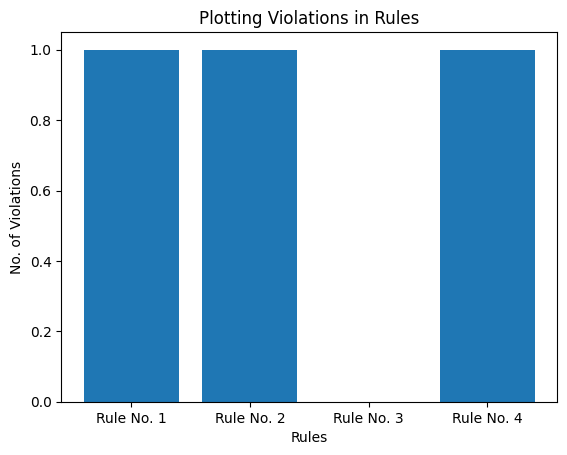

In [5]:
plt.xlabel('Rules')
plt.ylabel('No. of Violations')
plt.title('Plotting Violations in Rules')
plt.bar(my_rules, violations)
plt.show()

ruleset.py

In [ ]:
def age_check(df):
    errors = df['Age'][(df['Age']>150)|(df['Age']<0)].count()
    return errors, 'Checking if age is in range 0-150'

def age_marriage_check(df):
    errors = 0
    for i in range(len(df)):
        if df['Age'][i]<df['Yearsmarried'][i]:
            errors += 1
    return errors, 'Checking if Age is greater than Yearsmarried'

def status_check(df):
    errors = len(df) - len(df[df['Status'].isin(['single','married','widowed'])])
    return errors, 'Checking if Status is from Single, Married, or Widowed'

def agegroup_check(df):
    errors = 0
    for i in range(len(df)):
        if df['Age'][i]<18 and df['Agegroup'][i]!='child':
            errors += 1
        elif df['Age'][i]>=18 and df['Age'][i]<65 and df['Agegroup'][i]!='adult':
            errors += 1
        elif df['Age'][i]>=65 and df['Agegroup'][i]!='elderly':
            errors += 1

    return errors, 'Checking if Age Group is Violated'

people.txt

In [ ]:
Age,Agegroup,Height,Status,Yearsmarried
21,adult,6.0,single,-1
2,child,3,married,0
18,adult,5.7,married,20
221,elderly,5,widowed,2
34,child,-7,married,3